In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.constrained_layout.use'] = True

import dask
print(f'dask: {dask.__version__}')

import netCDF4
import xarray as xr

from psutil import virtual_memory

mem = virtual_memory()
print(f'Physical memory: {mem.total/1024/1024/1024:.0f} Gb')  # total physical memory available

import logging
logging.basicConfig(filename='example.log', level=logging.DEBUG)

dask: 2.11.0
Physical memory: 504 Gb


In [2]:
%load_ext autoreload

%autoreload 2

import toolbox_scs as tb
print(tb.__file__)
import toolbox_scs.routines.boz as boz

from extra_data.read_machinery import find_proposal

/home/lleguy/notebooks/ToolBox/src/toolbox_scs/__init__.py


# Loading analysis parameters

In [3]:
proposal = 2937
root = find_proposal(f'p{proposal:06d}')
path = root + '/usr/processed_runs/'

In [4]:
# list of tuple (runNB, darkrunNB)
runlist = [(688, 671),
           (690, 671)
          ]
savename = 'summary-688-690'

In [5]:
#xaxis = 'nrj'
xaxis = 'delay_mm'

In [6]:
fnames = [path + f'r{r:04d}/small-data-run{r}-darkrun{d}.h5'for r,d in runlist]

In [7]:
ds = xr.open_mfdataset(fnames, parallel=True, join='outer')
ds.load()
ds.close()
ds

<xarray.Dataset>
Dimensions:            (dim_0: 1, pulse_slot: 2700, sa3_pId: 20, trainId: 25880)
Coordinates:
  * sa3_pId            (sa3_pId) int64 602 642 682 722 ... 1242 1282 1322 1362
  * trainId            (trainId) uint64 1155313075 1155313076 ... 1155353394
Dimensions without coordinates: dim_0, pulse_slot
Data variables:
    0                  (trainId, sa3_pId) float64 2.897e+05 ... 4.276e+05
    0X                 (trainId, sa3_pId) float64 6.034e+04 ... 8.999e+04
    0X_area            (dim_0, trainId, sa3_pId) float64 2.132e+03 ... 2.132e+03
    0X_sat             (trainId, sa3_pId) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    0_area             (dim_0, trainId, sa3_pId) float64 6.396e+03 ... 6.396e+03
    0_sat              (trainId, sa3_pId) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    10X1               (trainId, sa3_pId) float64 7.858e+04 ... 1.114e+05
    10X1_area          (dim_0, trainId, sa3_pId) float64 1.599e+03 ... 1.599e+03
    10X1_sat           (trainId, sa3_pId) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    10X2               (trainId, sa3_pId) float64 2.433e+04 ... 3.969e+04
    10X2_area          (dim_0, trainId, sa3_pId) float64 1.025e+03 ... 1.025e+03
    10X2_sat           (trainId, sa3_pId) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    11X                (trainId, sa3_pId) float64 7.097e+04 ... 9.93e+04
    11X_area           (dim_0, trainId, sa3_pId) float64 2.173e+03 ... 2.173e+03
    11X_sat            (trainId, sa3_pId) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    1X1                (trainId, sa3_pId) float64 3.387e+04 ... 3.775e+04
    1X1_area           (dim_0, trainId, sa3_pId) float64 1.025e+03 ... 1.025e+03
    1X1_sat            (trainId, sa3_pId) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    1X2                (trainId, sa3_pId) float64 6.46e+04 ... 1.077e+05
    1X2_area           (dim_0, trainId, sa3_pId) float64 1.599e+03 ... 1.599e+03
    1X2_sat            (trainId, sa3_pId) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    2X1                (trainId, sa3_pId) float64 8.47e+04 ... 1.072e+05
    2X1_area           (dim_0, trainId, sa3_pId) float64 1.599e+03 ... 1.599e+03
    2X1_sat            (trainId, sa3_pId) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    2X2                (trainId, sa3_pId) float64 2.5e+04 ... 4.094e+04
    2X2_area           (dim_0, trainId, sa3_pId) float64 1.025e+03 ... 1.025e+03
    2X2_sat            (trainId, sa3_pId) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    3X                 (trainId, sa3_pId) float64 8.024e+04 ... 9.646e+04
    3X_area            (dim_0, trainId, sa3_pId) float64 2.173e+03 ... 2.173e+03
    3X_sat             (trainId, sa3_pId) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    8X                 (trainId, sa3_pId) float64 5.376e+04 ... 8.212e+04
    8X_area            (dim_0, trainId, sa3_pId) float64 2.132e+03 ... 2.132e+03
    8X_sat             (trainId, sa3_pId) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    9X1                (trainId, sa3_pId) float64 3.015e+04 ... 3.873e+04
    9X1_area           (dim_0, trainId, sa3_pId) float64 1.025e+03 ... 1.025e+03
    9X1_sat            (trainId, sa3_pId) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    9X2                (trainId, sa3_pId) float64 6.18e+04 ... 1.012e+05
    9X2_area           (dim_0, trainId, sa3_pId) float64 1.599e+03 ... 1.599e+03
    9X2_sat            (trainId, sa3_pId) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    BAM1932M           (trainId, sa3_pId) float32 0.372461 ... 0.32007748
    PP800_DelayLine    (trainId) float64 7.532 7.532 7.531 ... 7.684 7.684 7.683
    b0                 (trainId, sa3_pId) float64 896.0 -76.99 ... 152.9 658.5
    b0_area            (dim_0, trainId, sa3_pId) float64 1.472e+03 ... 1.472e+03
    b0_sat             (trainId, sa3_pId) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    b1                 (trainId, sa3_pId) float64 1.852e+03 -16.05 ... 1.714e+03
    b10                (trainId, sa3_pId) float64 1.02e+03 255.1 ... 1.396e+03
    b10_area           (dim_0, trainId, sa3_pId) float64 1.472e+03 ... 1.472e+03
    b10_sa

In [8]:
if xaxis == 'delay_mm':
    bin_width = 0.05*0.15 #0.15mm is 1ps
else:
    bin_width = 0.1

In [9]:
dXAS = tb.xas(ds, bin_width, Iokey = 'p', Itkey = 'n', nrjkey = xaxis, plot=False)
XASp = tb.xas(ds, bin_width, Iokey = '0', Itkey = 'p', nrjkey = xaxis, plot=False)
XASn = tb.xas(ds, bin_width, Iokey = '0', Itkey = 'n', nrjkey = xaxis, plot=False)

In [10]:
ph = ds['nrj'].mean().values
t0 = 7.57 #mm
t = -(ds['delay_ps'].mean().values - t0/.15)

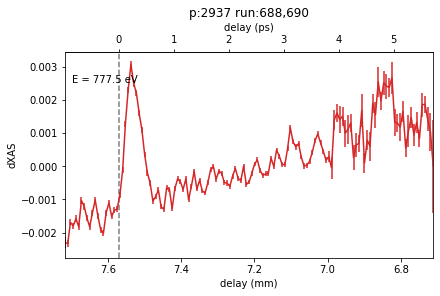

In [11]:
f = plt.figure()
ax = f.gca()
ax.errorbar(dXAS['nrj'], dXAS['muA'] - dXAS['muA'][0], dXAS['sterrA'], c='C3')
ax.set_ylabel('dXAS')
runs = ",".join([f'{r}' for r,d in runlist])
ax.set_title(f'p:{proposal} run:{runs}')
if xaxis == 'delay_mm':
    ax.set_xlabel('delay (mm)')
    ax.axvline(t0, c='k', alpha=0.5, ls='--')
    ax.text(0.02, 0.85, f'E = {ph:.1f} eV', transform=ax.transAxes)
    secax = ax.secondary_xaxis('top', functions=(lambda x: -(x - t0)/0.15,  lambda x: -x*0.15 + t0))
    secax.set_xlabel('delay (ps)')
    ax.set_xlim([np.nanmax(dXAS['nrj']), np.nanmin(dXAS['nrj'])])
if xaxis == 'nrj':
    ax.set_xlabel('Energy (eV)')
    ax.text(0.02, 0.85, f't = {t:.1f} ps', transform=ax.transAxes)
    ax2 = ax.twinx()
    ax2.errorbar(XASp['nrj'], XASp['muA'] - XASp['muA'][0], XASp['sterrA'], label='p')
    ax2.errorbar(XASn['nrj'], XASn['muA'] - XASn['muA'][0], XASn['sterrA'], label='n')
    ax2.set_ylabel('XAS')
    ax.legend(loc=2)

### save the figure

In [12]:
fname = path + savename + '.png'
f.savefig(fname, dpi=300)

# Saving binned data

In [13]:
dv = {}
for x, x_str in [(dXAS, 'dXAS'), (XASp, 'XASp'), (XASn, 'XASn')]:
    for k in x.keys():
        if k == 'nrj':
            continue
        dv[x_str + '_' + k] = {"dims": xaxis, "data": x[k]}

ds = {
    "coords": {xaxis: {"dims": xaxis, "data": dXAS['nrj'],
                     "attrs": {"units": "mm" if xaxis == 'delay_mm' else "eV"}}},
    "attrs": {"runs": runs},
    "dims": xaxis,
    "data_vars": dv}
ds = xr.Dataset.from_dict(ds)
ds

<xarray.Dataset>
Dimensions:      (delay_mm: 135)
Coordinates:
  * delay_mm     (delay_mm) float64 6.712 6.719 6.727 ... 7.702 7.709 7.717
Data variables:
    dXAS_muA     (delay_mm) float64 0.1079 0.1089 0.1093 ... 0.1056 0.1056
    dXAS_sterrA  (delay_mm) float64 0.001399 0.0005816 ... 0.0001039 0.0001789
    dXAS_sigmaA  (delay_mm) float64 0.003958 0.005202 ... 0.005568 0.005262
    dXAS_muIo    (delay_mm) float64 2.46e+05 2.531e+05 ... 2.384e+05 2.355e+05
    dXAS_counts  (delay_mm) int64 8 80 283 543 247 ... 3069 3387 3969 2872 865
    XASp_muA     (delay_mm) float64 0.4743 0.458 0.4746 ... 0.4642 0.4681 0.4612
    XASp_sterrA  (delay_mm) float64 0.02287 0.007049 ... 0.001269 0.002192
    XASp_sigmaA  (delay_mm) float64 0.06468 0.06305 0.06243 ... 0.06798 0.06447
    XASp_muIo    (delay_mm) float64 3.952e+05 4.001e+05 ... 3.807e+05 3.735e+05
    XASp_counts  (delay_mm) int64 8 80 283 543 247 ... 3069 3387 3969 2872 865
    XASn_muA     (delay_mm) float64 0.5822 0.5669 0.5839 ... 0.5736 0.5668
    XASn_sterrA  (delay_mm) float64 0.02177 0.006726 ... 0.001212 0.002094
    XASn_sigmaA  (delay_mm) float64 0.06158 0.06016 0.05893 ... 0.06497 0.06159
    XASn_muIo    (delay_mm) float64 3.952e+05 4.001e+05 ... 3.807e+05 3.735e+05
    XASn_counts  (delay_mm) int64 8 80 283 543 247 ... 3069 3387 3969 2872 865
Attributes:
    runs:     688,690

In [14]:
fname = path + savename + '.h5'
print(fname)
ds.to_netcdf(fname, format='NETCDF4', engine='h5netcdf')

/gpfs/exfel/exp/SCS/202122/p002937/usr/processed_runs/summary-688-690.h5
